# Titanic Investigation

### "Women and Children first!" became a popular code of conduct after the Titanic sank in 1912. 

### It also inspired the first questions I thought of when I first saw this dataset: 
1) Did both women and children indeed survive more than men? <br>
2) And between women and children, was one group more likely to survive than the other? 

I'll be exploring these questions in the following analysis


# Importing the data

<p>The first step in my analysis of the titanic data set was to import the data into a dataframe using the passenger id as the index and just explore the structure of the dataset using the head method.</p>

In [1]:
##import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.axes import Subplot
import seaborn as sns
import scipy.stats as scistat

## read in the datasets

titanic_df_init = pd.read_csv('C:/Users/Abhi/Downloads/Datasets/titanic_data.csv')

## setting the passenger id as the index for the dataframe
titanic_df = titanic_df_init.set_index('PassengerId')

print titanic_df.head()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2   

C:\Users\Abhi\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Data Wrangling

<p>Looking at the dataset, I decided that it was first critical to wrangle the data into the structures that would make analysis easier later on. In doing so I set out to perform a few wrangling tasks:</p>

a. To make some computation and analysis work with the gender of passengers easier, I decided to add a **"Gender"** column to illustrate **male/female** with the numberical keys **0/1** instead.

b. I was finding it problematic that the Age column had several Nan values and I thought this would make analysis work where Age was involved a bit difficult to generalize to the dataset. So I took some inspiration from <a>https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii</a> to fill the age value for a passenger without an age value based on the median age of people of their gender and class of travel. 

c. Finally, keeping in mind that my orignal question enquires about children, I thought it might be useful to create a **"Who"** column to seperate between **men, women and children** (below 18 years old) in the passenger dataset. This enabled me to look at the children data in greater detail later.

d. In the end, I dropped columns that I was quite sure I wouldn't be interested in looking at in this analysis

In [2]:
## Replacing male/female with binary values 0/1
titanic_df['Gender'] = titanic_df['Sex']
titanic_df['Gender'] = titanic_df['Gender'].dropna().replace(to_replace = ['male','female'],value = [0,1])

## Calculating the median age values for each gender by class
median_age_class = np.ones((2,3))

for i in range(0,2):
    for j in range(0,3):
        median_age_class[i,j] = \
        titanic_df[(titanic_df['Gender'] == i) & (titanic_df['Pclass'] == j + 1)]['Age'].dropna().median()

## Creating a complete age column by replacing Nan values with appropriate median age as per gender and class
titanic_df['AgeFill'] = titanic_df['Age']

## Filling in the AgeFill column with the median ages estimated as per class and gender of passenger (Kaggle)
for i in range(0, 2):
    for j in range(0, 3):
        titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Gender == i) & (titanic_df.Pclass == j+1),\
                'AgeFill'] = median_age_class[i,j]

## Creating a who column to classify by (man, woman, child)
titanic_df['Who'] = titanic_df['Sex']
titanic_df.loc[(titanic_df['AgeFill'] < 18),'Who'] = 'child'

##Dropping the columns that I was sure weren't going to be used in my analysis
titanic_df = titanic_df.drop(['Age','Name','Sex','Ticket','Cabin','Embarked'], axis = 1)

##Printing out the new data structure
print 'New working data structure for Titanic Dataset'
print titanic_df.tail(12)


New working data structure for Titanic Dataset
             Survived  Pclass  SibSp  Parch     Fare  Gender  AgeFill     Who
PassengerId                                                                  
880                 1       1      0      1  83.1583       1     56.0  female
881                 1       2      0      1  26.0000       1     25.0  female
882                 0       3      0      0   7.8958       0     33.0    male
883                 0       3      0      0  10.5167       1     22.0  female
884                 0       2      0      0  10.5000       0     28.0    male
885                 0       3      0      0   7.0500       0     25.0    male
886                 0       3      0      5  29.1250       1     39.0  female
887                 0       2      0      0  13.0000       0     27.0    male
888                 1       1      0      0  30.0000       1     19.0  female
889                 0       3      1      2  23.4500       1     21.5  female
890              

# Exploring the data

To get to know the distribution of the dataset a little better, I decided to explore the dataset for  relationships and visual trends using 3 tools:

1) I used to boxplot to give me a quick indication of how the different columns were distributed, how "normal" they were and whether any of them were significantly influenced by outliers

2) Then I used histograms to better understand the distribution of individual columns. I especially looked at the barcharts for features like AgeFill, Gender and Survived.

3) Finally I wanted to see if there were any strong correlations between the features and also have a look at the basic descriptive statistics for the features. I used the corr() and describe() functions to do this 


         Survived      Pclass       SibSp       Parch        Fare      Gender  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.523008    0.381594   32.204208    0.352413   
std      0.486592    0.836071    1.102743    0.806057   49.693429    0.477990   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    0.000000    7.910400    0.000000   
50%      0.000000    3.000000    0.000000    0.000000   14.454200    0.000000   
75%      1.000000    3.000000    1.000000    0.000000   31.000000    1.000000   
max      1.000000    3.000000    8.000000    6.000000  512.329200    1.000000   

          AgeFill  
count  891.000000  
mean    29.112424  
std     13.304424  
min      0.420000  
25%     21.500000  
50%     26.000000  
75%     36.000000  
max     80.000000  
          Survived    Pclass     SibSp     Parch      Fare    Gender   AgeFill
Survived  1

C:\Users\Abhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


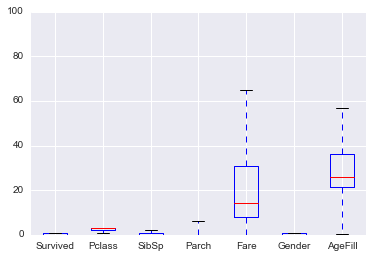

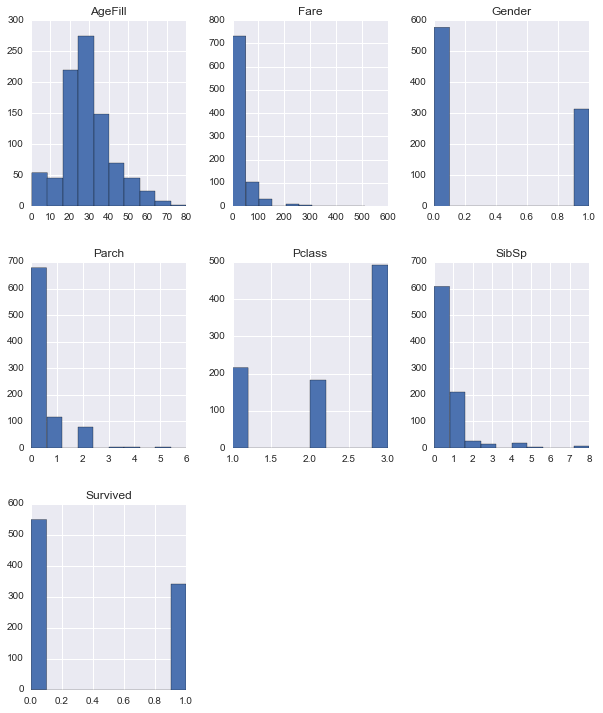

In [3]:
%matplotlib inline

##Exploring the data with a boxplot and histograms for each column
titanic_df.boxplot()
plt.ylim(ymax = 100)
titanic_df.hist(figsize = (10,12))

## Basic descriptive statistics of the dataset
print titanic_df.describe()

## Getting the Correlations between all the columns
print titanic_df.corr()


Next I wanted to start directly exploring my original question of whether women and children were more likely to survive than men and whether there was a difference in the likelihood of women surviving vs children.

The hypotheses that my questions are represented by are as follows:

a) H0a: There is no significant difference between the likelihood(here defined as the average survival value where death is 0 and survival is 1) of a man surviving as compared to the likelihood of a women and child surviving:

                                            μm = μfc
                                            
   H1a: The likelihood of a women or child surviving the titanic is greater than that of a man
   
                                            μm < μfc
                                            
b) H0b: There is no significant difference between the likelihood of a woman surviving and that of child surviving

                                            μf = μc
   
   H1b: There is a significant difference between the likelihood of a woman surviving and that of a child surviving.
   
                                            μf ≠ μc

Before performing the t test, I thought it would be useful to see the distribution of survival and non survival among men,women and children(ie. the 'Who' feature).

I used a countplot from seaborn to represent this by using the hues as the 'Who' columns values. 

[<matplotlib.text.Text at 0x1fb41e80>, <matplotlib.text.Text at 0x1a0929e8>]

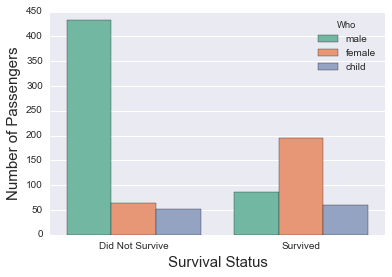

In [4]:
## Creating a plot of Survival vs non survival By (Men,Women and Children)

p1 = sns.countplot(x = 'Survived', hue = 'Who', data = titanic_df, palette = 'Set2')
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Survival Status', fontsize = 15)
sns.despine()
p1.set_xticklabels(['Did Not Survive', 'Survived']) #Adding tick labels that are more intuitive for the reader



The chart above seemed to suggest that a much greater proportion of women and children survived as compared to men. 

So I decided to proceed to use a one tailed independednt sample t test to test my hypothesis statistically for a)

And a two tailed independent sample t test to test my hypothesis for b)


### Hypothesis a

In [6]:

##Creating dataframes of the appropriate views in preparation for statistical tests
female_df = titanic_df[titanic_df['Who'] == 'female']
child_df = titanic_df[titanic_df['Who'] == 'child']
men_df = titanic_df[titanic_df['Who'] == 'male']
wom_and_chi_df = pd.concat([female_df,child_df])

## T Test to check hypothesis a (ie. if women and children were more likely to survive than men)

scistat.ttest_ind(wom_and_chi_df['Survived'], men_df['Survived'], equal_var = False)


Ttest_indResult(statistic=17.970316837187614, pvalue=1.74751653713372e-59)

Based on the above t test, the p value is below 0.05 (alpha level for this one tailed test) and therefore we **reject the null hypothesis**

### Hypothesis b

For my second hypothesis that women and children do not have the same likelihood of survival, I used a two talied test independent sample t test.

In [7]:
## T Test to check hypothesis b (ie. that women and children did not have the same likelihood of suvival)

scistat.ttest_ind(female_df['Survived'], child_df['Survived'], equal_var = False)


Ttest_indResult(statistic=3.9302662336014, pvalue=0.00011915003921288802)

Based on the above t test, the p value is below 0.025 (this is a two tailed test so we compare to 0.025 instead of alpha of 0.05) and therefore **we reject the null hypothesis**

The result of the test seems to suggest that women were more likely to survive than children on the Titanic. This came across as an unexpected result to me (infact I expected it to be the other way around!). 

I decided to go back to the dataset and check if there are other variables that could be spuriously affecting the 'Who' --> 'Surivived' relationship (especially in the case of women and children)

To do this I wanted to look at the descriptive statistics for the women and children group separately using the describe funciton

In [8]:
## Descriptive statistics for the passengers who were children
child_df.describe()


,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.539823,2.584071,1.460177,1.053097,31.220798,0.486726,9.041327
std,0.500632,0.677781,1.625881,0.800008,32.538092,0.502050,6.030408
min,0.000000,1.000000,0.000000,0.000000,7.054200,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,12.287500,0.000000,3.000000
50%,1.000000,3.000000,1.000000,1.000000,23.000000,0.000000,9.000000
75%,1.000000,3.000000,3.000000,2.000000,34.375000,1.000000,16.000000
max,1.000000,3.000000,5.000000,3.000000,211.337500,1.000000,17.000000


In [9]:
#Descriptive statistics for the female passengers
female_df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill
count,259.000000,259.000000,259.000000,259.000000,259.000000,259,259.000000
mean,0.752896,2.088803,0.586873,0.567568,46.963772,1,31.088803
std,0.432163,0.864811,1.057999,1.044676,61.269415,0,10.840270
min,0.000000,1.000000,0.000000,0.000000,6.750000,1,18.000000
25%,1.000000,1.000000,0.000000,0.000000,10.508350,1,21.500000
50%,1.000000,2.000000,0.000000,0.000000,23.250000,1,29.000000
75%,1.000000,3.000000,1.000000,1.000000,65.800000,1,37.500000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1,63.000000


Something that caught my eye when I looked at the descriptive statistics was the difference in the average class of travel between the two groups (female and child), so i decided to plot that using seaborn's countplot

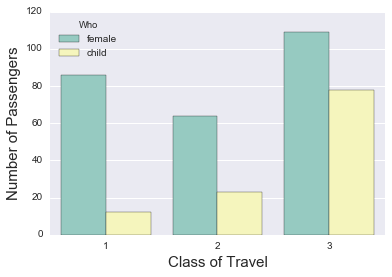

In [10]:
p1 = sns.countplot(x = 'Pclass', hue = 'Who', data = wom_and_chi_df ,order = (1,2,3), palette = 'Set3')
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Class of Travel', fontsize = 15)
sns.despine()

The visualization above was interesting to me because it demonstrated that the number of children increased as we got into the lower classes (taking 3 as lowest class) while the number of adult female passengers was lowest in class 2 and higher in classes 1 and 3. 

This suggested two things to me:

1) Maybe the average class of adult female passengers was higher than the average class of children

2) That class of the passenger could be the confounding variable (that is causing the difference in survival rate between females and children) if class of travel significantly affected the likelihood of survival for the whole sample. (ie. higher class passengers had a better chance of survival)

I set out to statistically test these two ideas

In [11]:

# T test for the hypothesis that the average class of an adult female passenger was higher than that of a child
scistat.ttest_ind(female_df['Pclass'], child_df['Pclass'], equal_var = False)


Ttest_indResult(statistic=-5.9395526663592157, pvalue=8.8151380171812155e-09)

In [12]:
# Creating dataframes for each of the independent sample groups
pclass1_df = titanic_df[titanic_df['Pclass'] == 1]
pclass2_df = titanic_df[titanic_df['Pclass'] == 2]
pclass3_df = titanic_df[titanic_df['Pclass'] == 3]

# T tests for the hypothesis that higher classes had a better chance of survival
print scistat.ttest_ind(pclass1_df['Survived'], pclass2_df['Survived'], equal_var = False)
print scistat.ttest_ind(pclass2_df['Survived'], pclass3_df['Survived'], equal_var = False)

Ttest_indResult(statistic=3.1700336636550834, pvalue=0.0016466817069658033)
Ttest_indResult(statistic=5.5299873454416524, pvalue=7.1612512729716009e-08)


Both came out as statistically significant upon testing at a 0.05 alpha level and therefore we can conclude that:

a) Adult females on average travelled in higher classes than children

b) Higher classes were more likely to survive than lower classes

# In Conclusion

In response to my original questions, I found that 

1) Women and children were more likely to survive than men and also 

2) That women were more likely to survive than children.

However the second conclusion has a confounding variable in Class of Travel because it was found that class of travel significantly affected likelihood of survival and significantly more children travelled by lower classes as compared to adult females. 
